In [2]:
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import OPTICS
import numpy as np
from sklearn.metrics import pairwise_distances
import pickle as pkl
import sklearn
from geopy import distance

from scipy.spatial.distance import cdist
from geopy.distance import distance as geodist

with open("jsondata.json") as f:
    js = json.load(f)

In [24]:
coords = [feat['geometry']['coordinates'] for feat in js['features']]
ble = [Point(c) for c in coords]
coords_np = np.array([c[::-1] for c in coords])

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [8]:
netherlands = result[result.name == "Netherlands"]

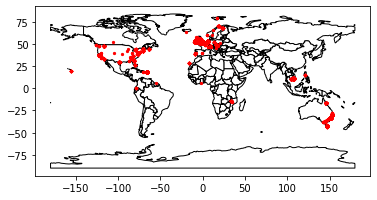

In [9]:
base = world.plot(color='white', edgecolor='black')
df.plot(ax=base, marker='o', color='red', markersize=5)
plt.show()

In [25]:

df = gpd.GeoDataFrame(js['features'], crs="EPSG:4326")

In [26]:
df

type                                           geometry  \
0      Feature  {'type': 'Point', 'coordinates': [106.73793792...   
1      Feature  {'type': 'Point', 'coordinates': [106.73796844...   
2      Feature  {'type': 'Point', 'coordinates': [106.73796844...   
3      Feature  {'type': 'Point', 'coordinates': [106.73796844...   
4      Feature  {'type': 'Point', 'coordinates': [106.73940277...   
...        ...                                                ...   
56563  Feature  {'type': 'Point', 'coordinates': [6.148425, 52...   
56564  Feature  {'type': 'Point', 'coordinates': [-121.1986833...   
56565  Feature  {'type': 'Point', 'coordinates': [4.7368383333...   
56566  Feature  {'type': 'Point', 'coordinates': [4.7368533333...   
56567  Feature  {'type': 'Point', 'coordinates': [6.13842217, ...   

                                              properties  
0      {'photo_id': 56161, 'filename': 'https://olm-s...  
1      {'photo_id': 56162, 'filename': 'https://olm-s...  
2      {'photo_id': 56163, 'filename': 'https://olm-s...  
3      {'photo_id': 56164, 'filename': 'https://olm-s...  
4      {'photo_id': 56165, 'filename': 'https://olm-s...  
...                                                  ...  
56563  {'photo_id': 113446, 'filename': 'https://olm-...  
56564  {'photo_id': 113447, 'filename': 'https://olm-...  
56565  {'photo_id': 113448, 'filename': 'https://olm-...  
56566  {'photo_id': 113449, 'filename': 'https://olm-...  
56567  {'photo_id': 113450, 'filename': 'https://olm-...  

[56568 rows x 3 columns]

In [27]:

df['geometry'] = df.apply(lambda row: Point(row['geometry']['coordinates']), axis=1)

In [28]:
props = df['properties'].apply(pd.Series)

In [29]:
df2 = pd.concat([df, props], axis=1)

In [30]:
with_world = gpd.sjoin(df, world, how='left').drop('properties', axis=1)

KeyError: "['properties'] not found in axis"

In [31]:
df2

type                     geometry  \
0      Feature   POINT (106.73794 10.79565)   
1      Feature   POINT (106.73797 10.79567)   
2      Feature   POINT (106.73797 10.79567)   
3      Feature   POINT (106.73797 10.79567)   
4      Feature   POINT (106.73940 10.79668)   
...        ...                          ...   
56563  Feature     POINT (6.14842 52.79217)   
56564  Feature  POINT (-121.19868 36.48136)   
56565  Feature     POINT (4.73684 52.48575)   
56566  Feature     POINT (4.73685 52.48575)   
56567  Feature     POINT (6.13842 52.79332)   

                                              properties  photo_id  \
0      {'photo_id': 56161, 'filename': 'https://olm-s...     56161   
1      {'photo_id': 56162, 'filename': 'https://olm-s...     56162   
2      {'photo_id': 56163, 'filename': 'https://olm-s...     56163   
3      {'photo_id': 56164, 'filename': 'https://olm-s...     56164   
4      {'photo_id': 56165, 'filename': 'https://olm-s...     56165   
...                                                  ...       ...   
56563  {'photo_id': 113446, 'filename': 'https://olm-...    113446   
56564  {'photo_id': 113447, 'filename': 'https://olm-...    113447   
56565  {'photo_id': 113448, 'filename': 'https://olm-...    113448   
56566  {'photo_id': 113449, 'filename': 'https://olm-...    113449   
56567  {'photo_id': 113450, 'filename': 'https://olm-...    113450   

                                                filename      model  \
0      https://olm-s3.s3.eu-west-1.amazonaws.com/2020...    CPH1801   
1      https://olm-s3.s3.eu-west-1.amazonaws.com/2020...    CPH1801   
2      https://olm-s3.s3.eu-west-1.amazonaws.com/2020...    CPH1801   
3      https://olm-s3.s3.eu-west-1.amazonaws.com/2020...    CPH1801   
4      https://olm-s3.s3.eu-west-1.amazonaws.com/2020...    CPH1801   
...                                                  ...        ...   
56563  https://olm-s3.s3.eu-west-1.amazonaws.com/2021...  iPhone XR   
56564  https://olm-s3.s3.eu-west-1.amazonaws.com/2020...   iPhone 8   
56565  https://olm-s3.s3.eu-west-1.amazonaws.com/2021...   iPhone 6   
56566  https://olm-s3.s3.eu-west-1.amazonaws.com/2021...   iPhone 6   
56567  https://olm-s3.s3.eu-west-1.amazonaws.com/2021...  iPhone XR   

                  datetime        lat         lon  \
0      2020-01-05 12:15:17  10.795654  106.737938   
1      2020-01-05 12:15:27  10.795668  106.737968   
2      2020-01-05 12:15:32  10.795668  106.737968   
3      2020-01-05 12:15:43  10.795668  106.737968   
4      2020-01-05 12:17:52  10.796682  106.739403   
...                    ...        ...         ...   
56563  2021-01-02 13:14:36  52.792167    6.148425   
56564  2020-12-07 11:39:40  36.481358 -121.198683   
56565  2021-01-02 15:17:22  52.485755    4.736838   
56566  2021-01-02 15:17:20  52.485753    4.736853   
56567  2021-01-02 18:46:49  52.793317    6.138422   

                                   result_string  
0                                  other.dump 1,  
1                                  other.dump 1,  
2                                  other.dump 1,  
3                                  other.dump 1,  
4                                  other.dump 1,  
...                                          ...  
56563                       softdrinks.tinCan 1,  
56564                             other.metal 1,  
56565  softdrinks.energy_can 1,brands.redbull 1,  
56566  softdrinks.energy_can 1,brands.redbull 1,  
56567                          other.balloons 1,  

[56568 rows x 10 columns]